# Modulo generador de datos

#### Importación de los datos

In [1]:
import pickle
import numpy as np
from astropy.table import Table, vstack
import matplotlib.pyplot as plt
flag = 0
for i in range(0,24):
    num = "0"+str(i) if i<10 else str(i)
    temp = pickle.load( open( "RA_DEC/"+num+".p", "rb" ) )
    if flag==0:
        t = temp
        flag=1
    else:
        t = vstack([t, temp])

#### Cambio de unidad de [h] a [°]

In [2]:
t['RA'] = t['RA']*15

### Obtención de parámetros estadísticos

In [3]:
ra_std = np.std(t['RA'])
ra_mean = np.mean(t['RA'])

dec_std = np.std(t['DEC'])
dec_mean = np.mean(t['DEC'])

### Gráfico para ver la distribución de los datos

<IPython.core.display.Javascript object>


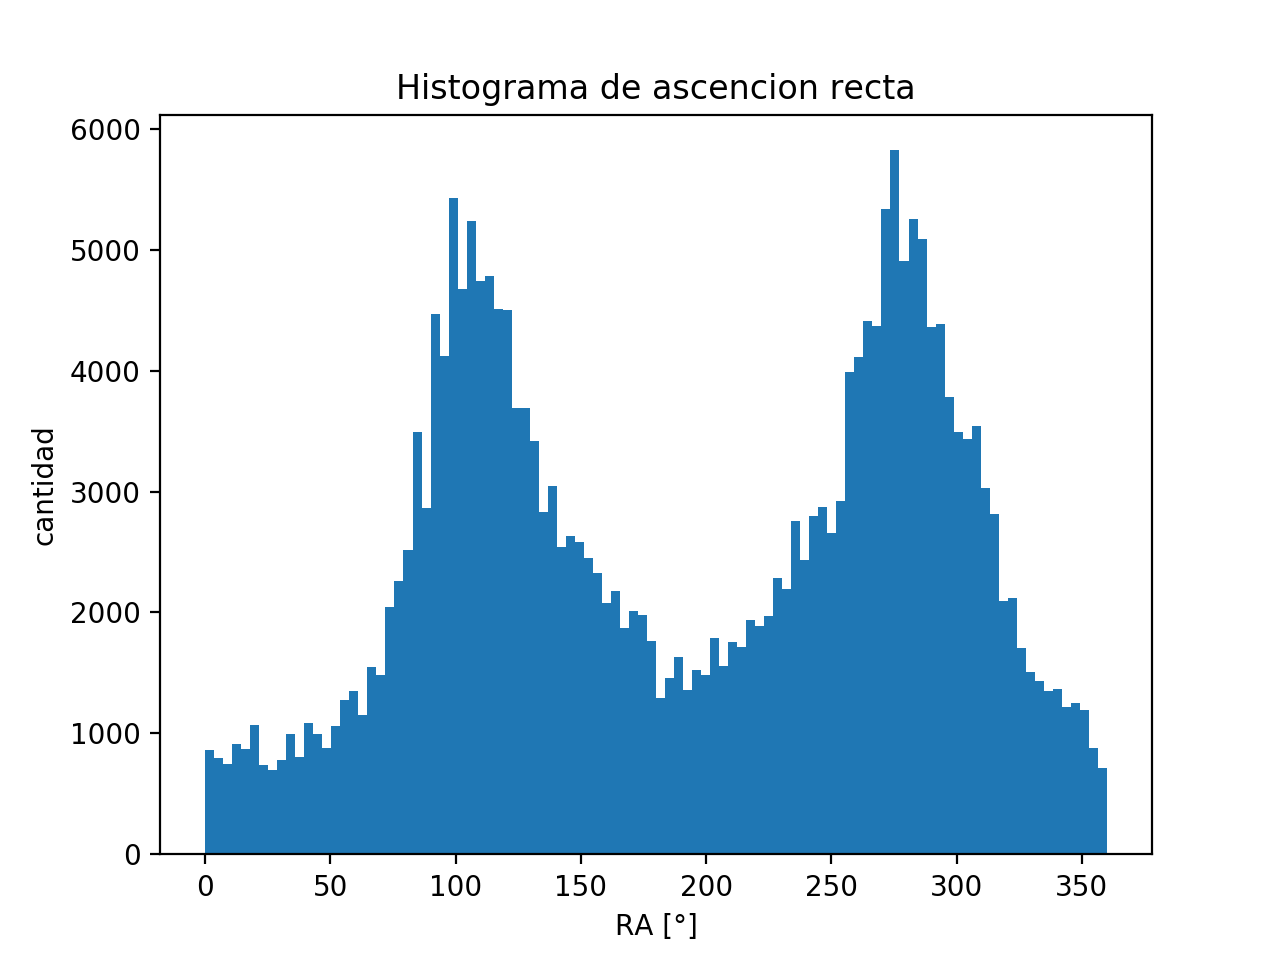

In [4]:
%matplotlib notebook
plt.figure()
plt.hist(t['RA'], bins=100)  # arguments are passed to np.histogram
plt.title("Histograma de ascencion recta")
plt.xlabel("RA [°]")
plt.ylabel("cantidad")
plt.show()

<IPython.core.display.Javascript object>


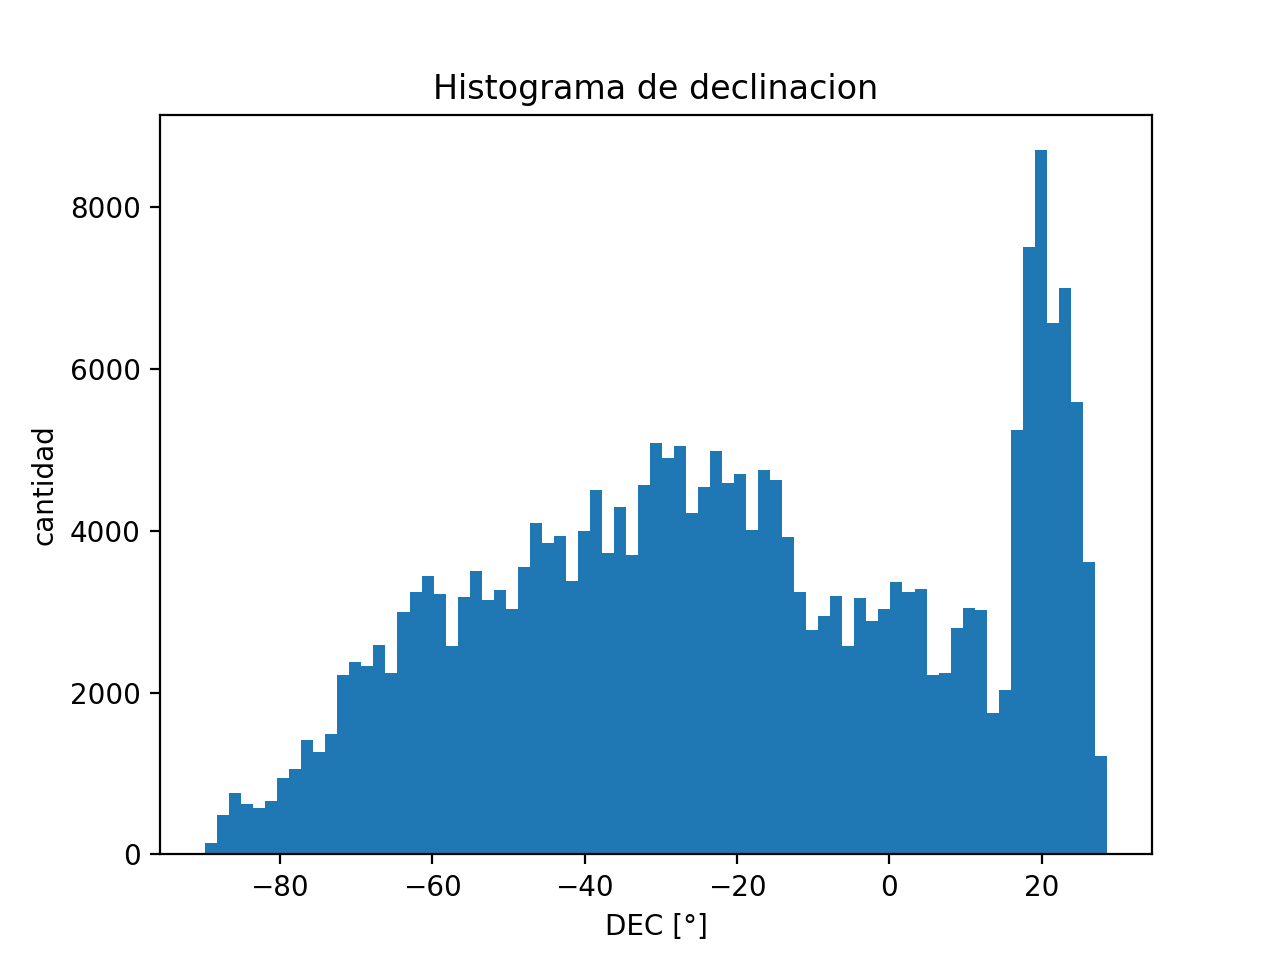

In [6]:
plt.figure()
plt.hist(t['DEC'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histograma de declinacion")
plt.xlabel("DEC [°]")
plt.ylabel("cantidad")
plt.show()

<IPython.core.display.Javascript object>


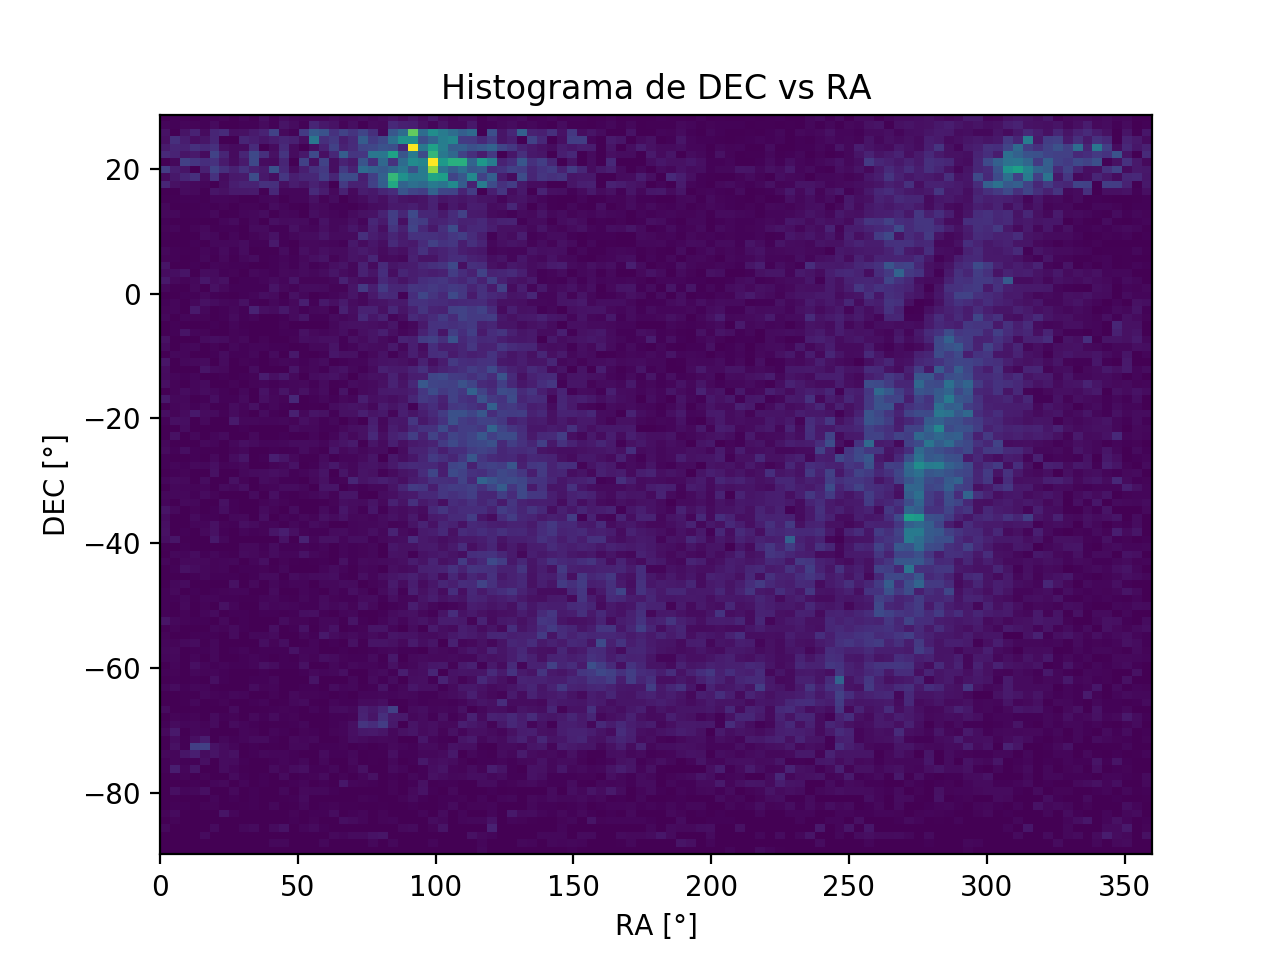

In [5]:
import matplotlib.colors as mcolors
from numpy.random import multivariate_normal
plt.figure()
plt.hist2d(t['RA'], t['DEC'], bins=100)
plt.title("Histograma de DEC vs RA")
plt.xlabel("RA [°]")
plt.ylabel("DEC [°]")
plt.show()

# Generación de datos
## 1.1.- Generación de números con distribución uniforme

In [4]:
n = 1000000-len(t)
ra_uni = np.random.uniform(min(t['RA']), max(t['RA']), n)
ra_uni = np.expand_dims(ra_uni, axis=1)
dec_uni = np.random.uniform(min(t['DEC']), max(t['DEC']), n)
dec_uni = np.expand_dims(dec_uni, axis=1)
t_aux = Table(data=np.append(ra_uni,dec_uni,axis=1), names=("RA","DEC"))
t_uni = t_aux
#t_uni = vstack([t_aux,t])

#### Grafico de los datos

<IPython.core.display.Javascript object>


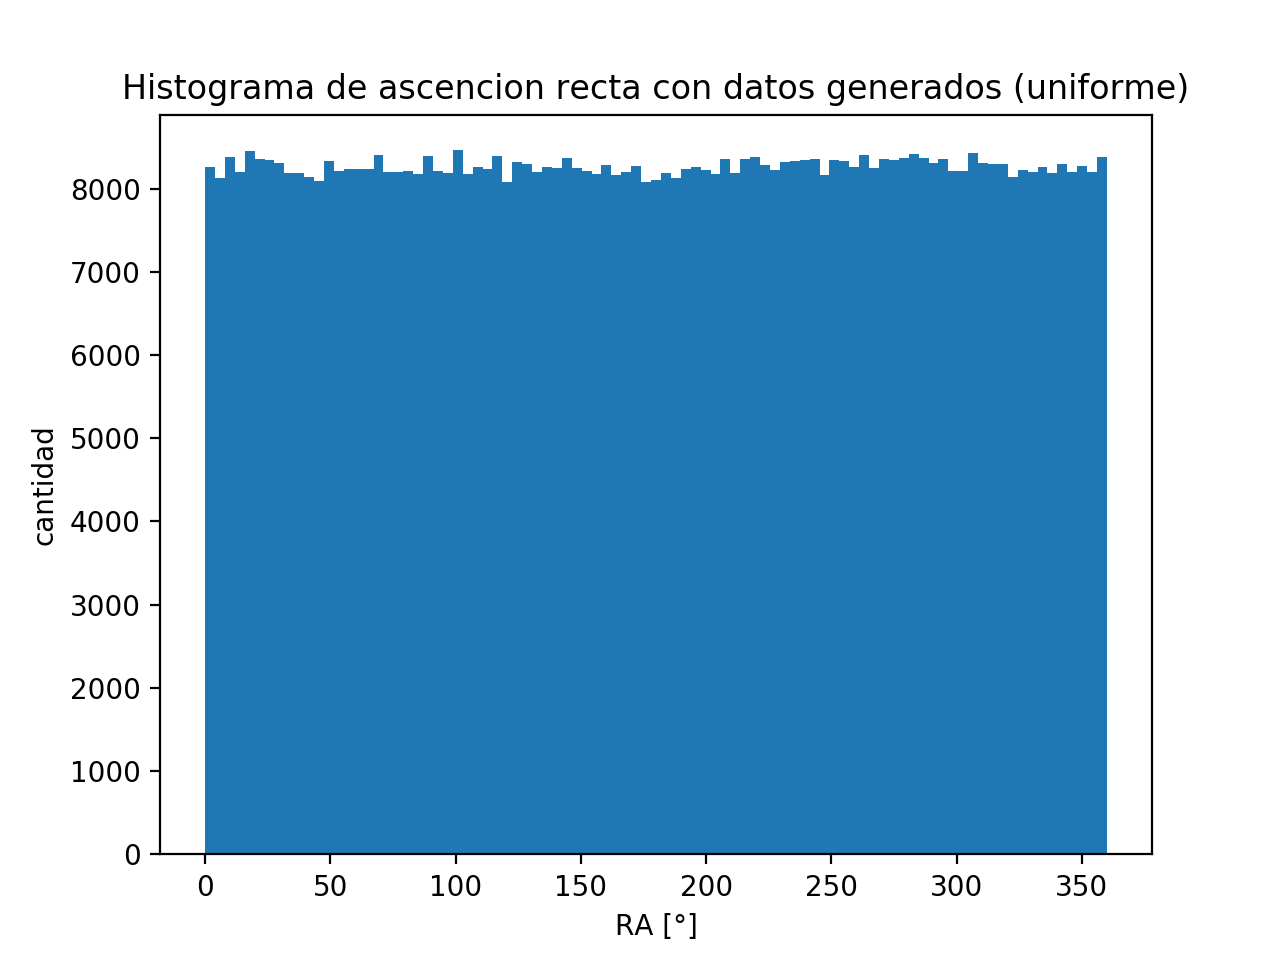

In [9]:
plt.figure()
plt.hist(t_uni['RA'], bins='auto')
plt.title("Histograma de ascencion recta con datos generados (uniforme)")
plt.xlabel("RA [°]")
plt.ylabel("cantidad")
plt.show()

## 1.2.- Generación de números con distribución normal
Manteniendo std y mean

In [11]:
s = np.random.normal(ra_mean, ra_std, n)
n = 1000000-len(t)
ra_norm = np.random.normal(ra_mean, ra_std, n)
ra_norm = np.expand_dims(ra_norm, axis=1)
dec_norm = np.random.normal(dec_mean, dec_std, n)
dec_norm = np.expand_dims(dec_norm, axis=1)
t_aux = Table(data=np.append(ra_norm,dec_norm,axis=1), names=("RA","DEC"))
t_temp = vstack([t_aux,t])

Grafico de los datos

<IPython.core.display.Javascript object>


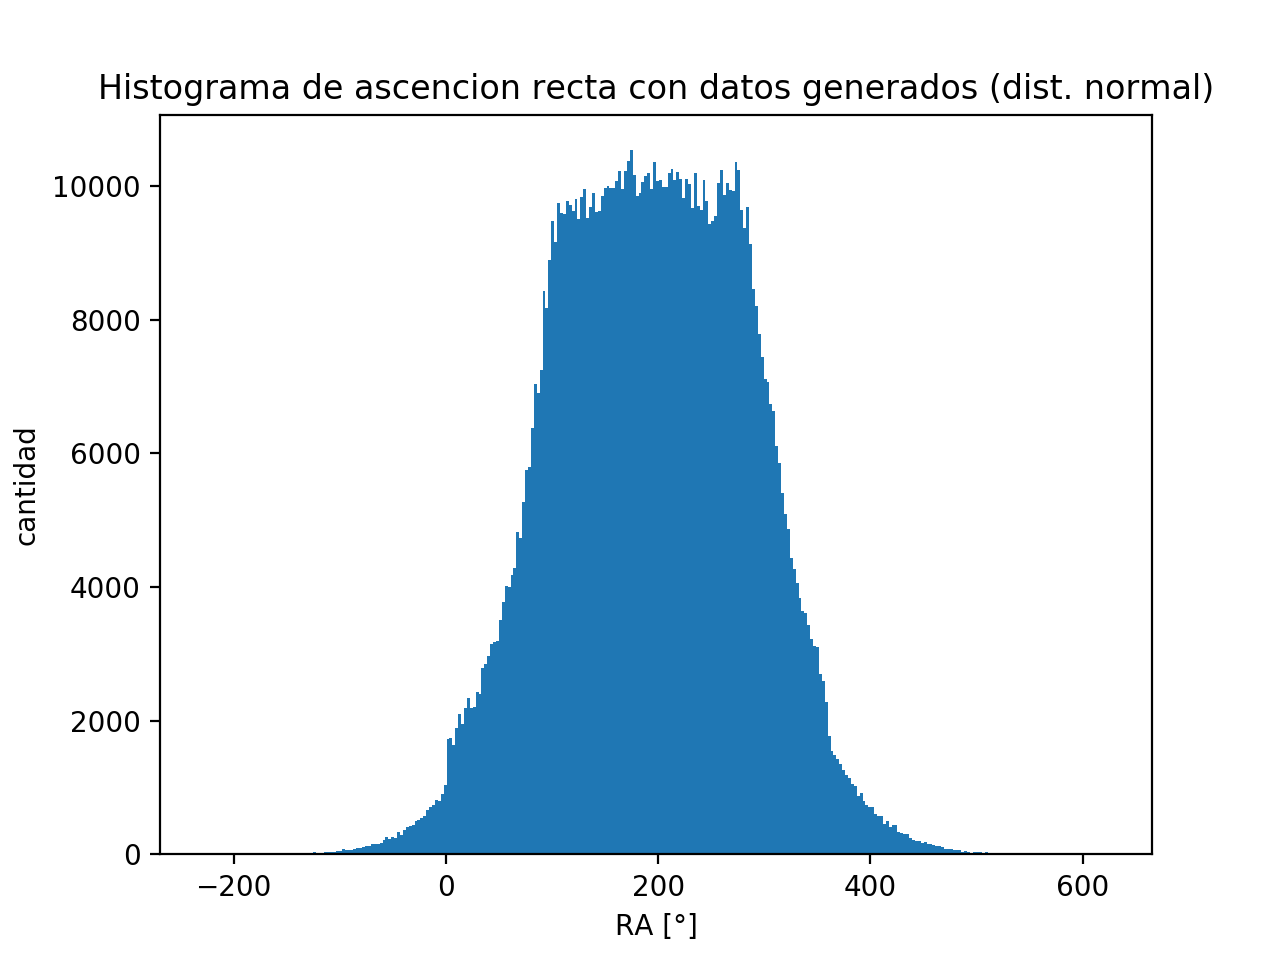

In [12]:
plt.figure()
plt.hist(t_temp['RA'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histograma de ascencion recta con datos generados (dist. normal)")
plt.xlabel("RA [°]")
plt.ylabel("cantidad")
plt.show()

<IPython.core.display.Javascript object>


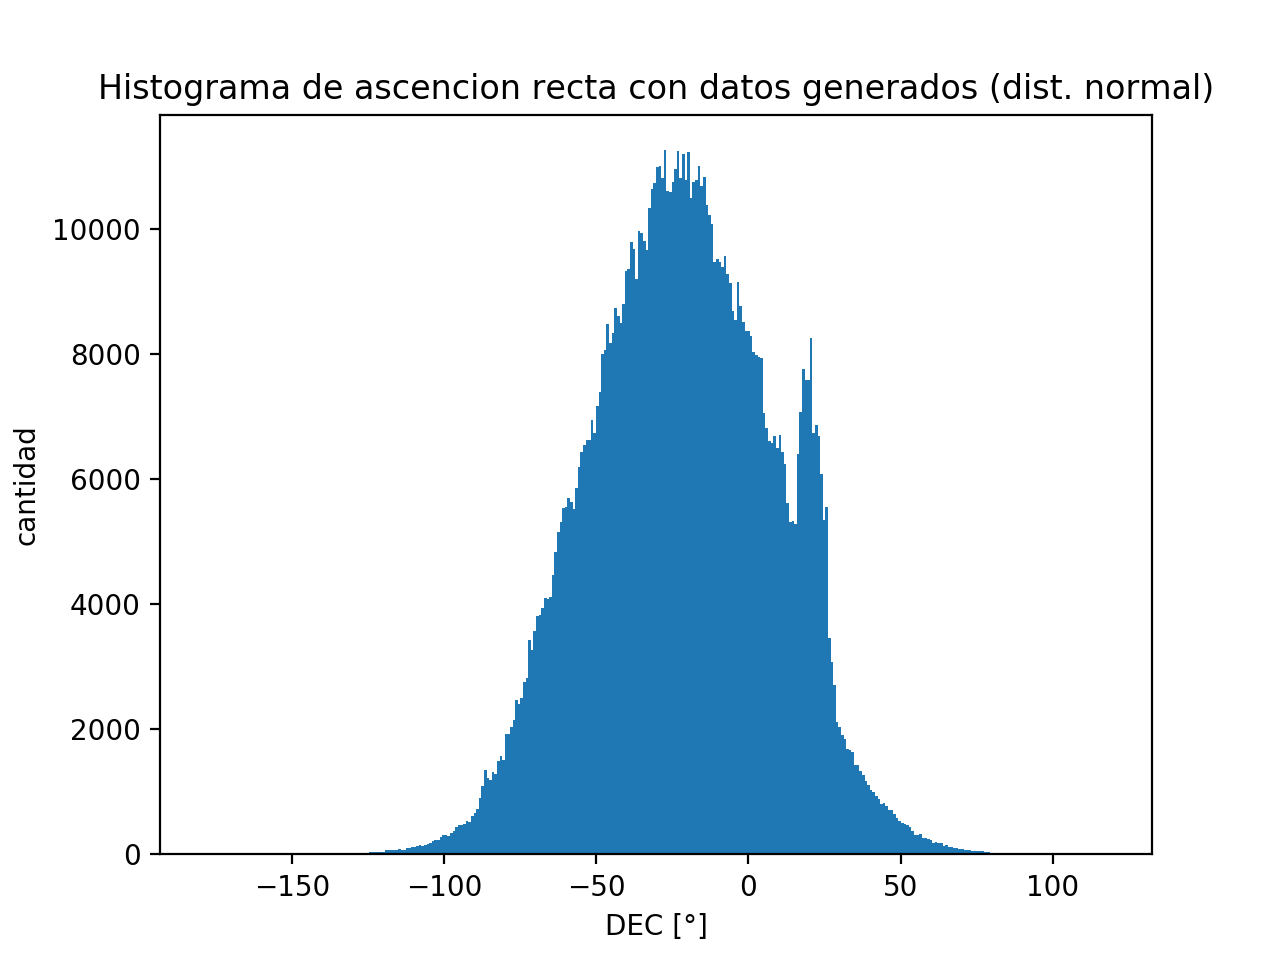

In [13]:
plt.figure()
plt.hist(t_temp['DEC'], bins='auto')
plt.title("Histograma de ascencion recta con datos generados (dist. normal)")
plt.xlabel("DEC [°]")
plt.ylabel("cantidad")
plt.show()

## 1.3.- Conclusiones
A partir de los gráficos anteriores se puede observar que la generación no debe realizarse mediante una distribución uniforme o una normal, ya que si bien cumplen con conservar la std y mean, no cumplen con conservar el comportamiento de los datos.

Es claro que el problema requiere resolverse con la distribución propia de los datos originales, es decir, basándose en los histogramas de ascención recta y declinación.

## 2.- Generación a partir de los histogramas
Se realizará un análisis solo para RA, luego para DEC se realizará de manera similar.
### 2.1.- Obteniendo acumulado del histograma

<IPython.core.display.Javascript object>


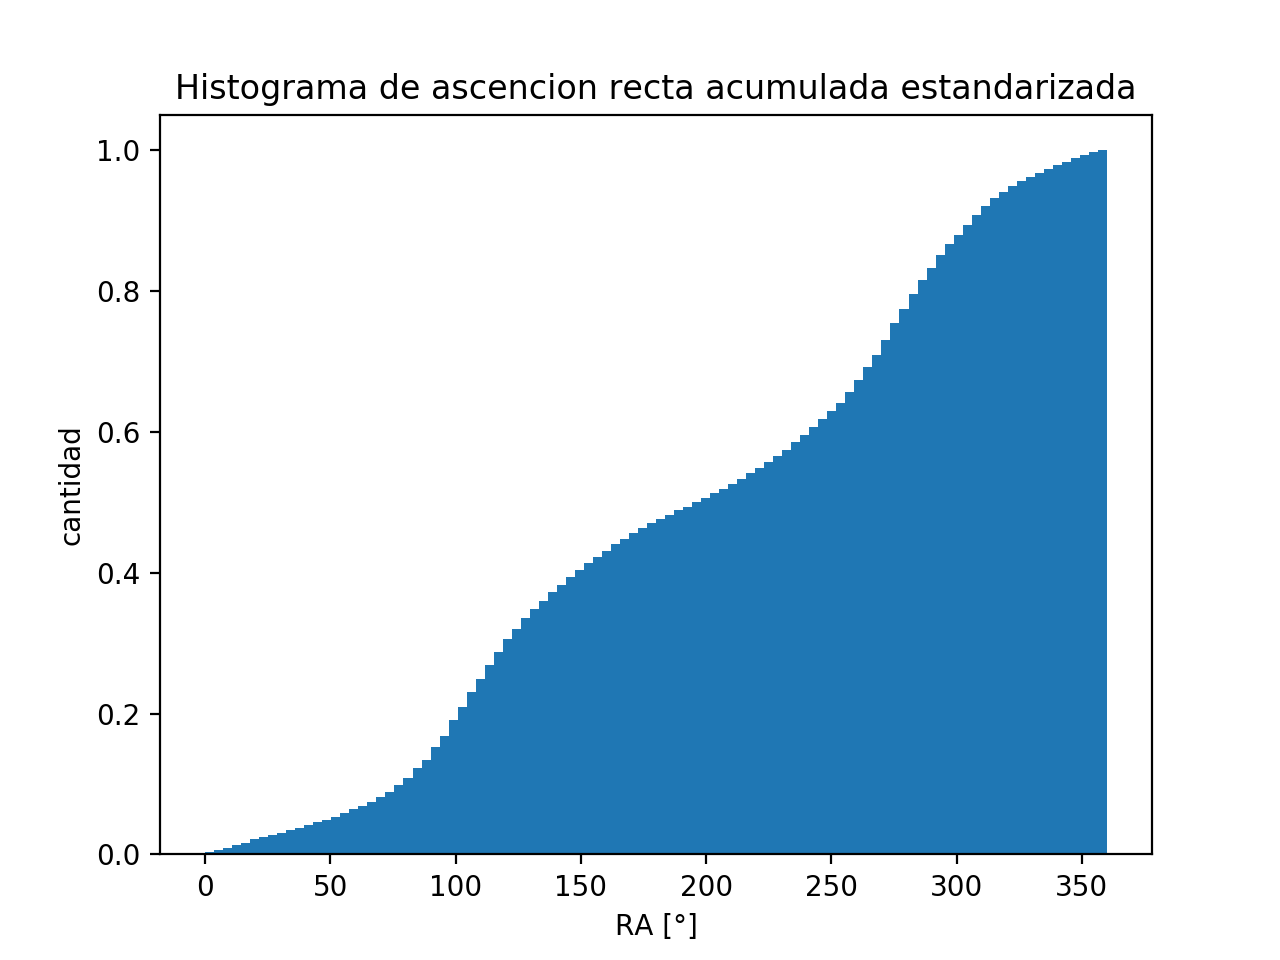

In [7]:
bins = 100
plt.figure()
ra_cumulative, ra_bins, patches = plt.hist(t['RA'], bins=bins, cumulative=1, density=1)
plt.title("Histograma de ascencion recta acumulada estandarizada")
plt.xlabel("RA [°]")
plt.ylabel("cantidad")
plt.show()

### 2.2.- Obteniendo números aleatorios a partir de una distribución uniforme

<IPython.core.display.Javascript object>


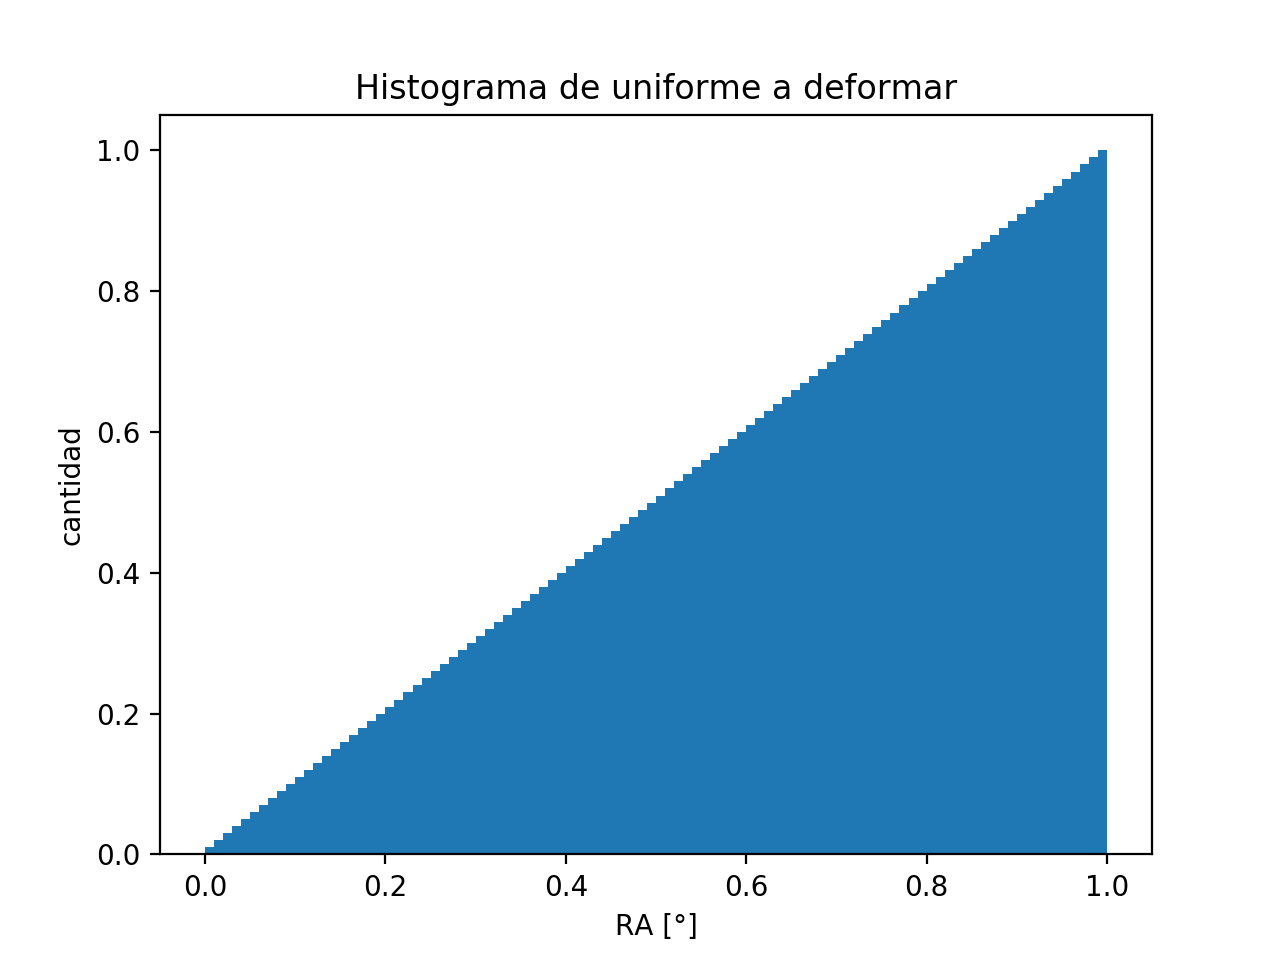

In [9]:
n = 10000000-len(t)
ra_uni = np.random.uniform(0, 1, n)
plt.figure()
uni_acumulative, uni_bins, uni_patch = plt.hist(ra_uni, bins=bins, cumulative=1, density=1)
plt.title("Histograma de uniforme a deformar")
plt.xlabel("RA [°]")
plt.ylabel("cantidad")
plt.show()

### 2.3.- Función que realizará la deformación de la uniforme

Definición de la función que realizará la deformación de la uniforme, entra un valor generado uniformemente y sale un valor ajustado a la distribución de la ascención recta.

In [10]:
counter = 0
def ra_uniform_deform(x):
    index = np.where(x < ra_cumulative)[0][0]
    return (ra_bins[index+1]-ra_bins[index])*np.random.uniform(0,1,1)[0]+ra_bins[index]

vf = np.vectorize(ra_uniform_deform)

### 2.4.- Aplicando la función a todo el arreglo

In [11]:
result_ra = np.array([ra_uniform_deform(xi) for xi in ra_uni])

Graficando el histograma del resultado

<IPython.core.display.Javascript object>


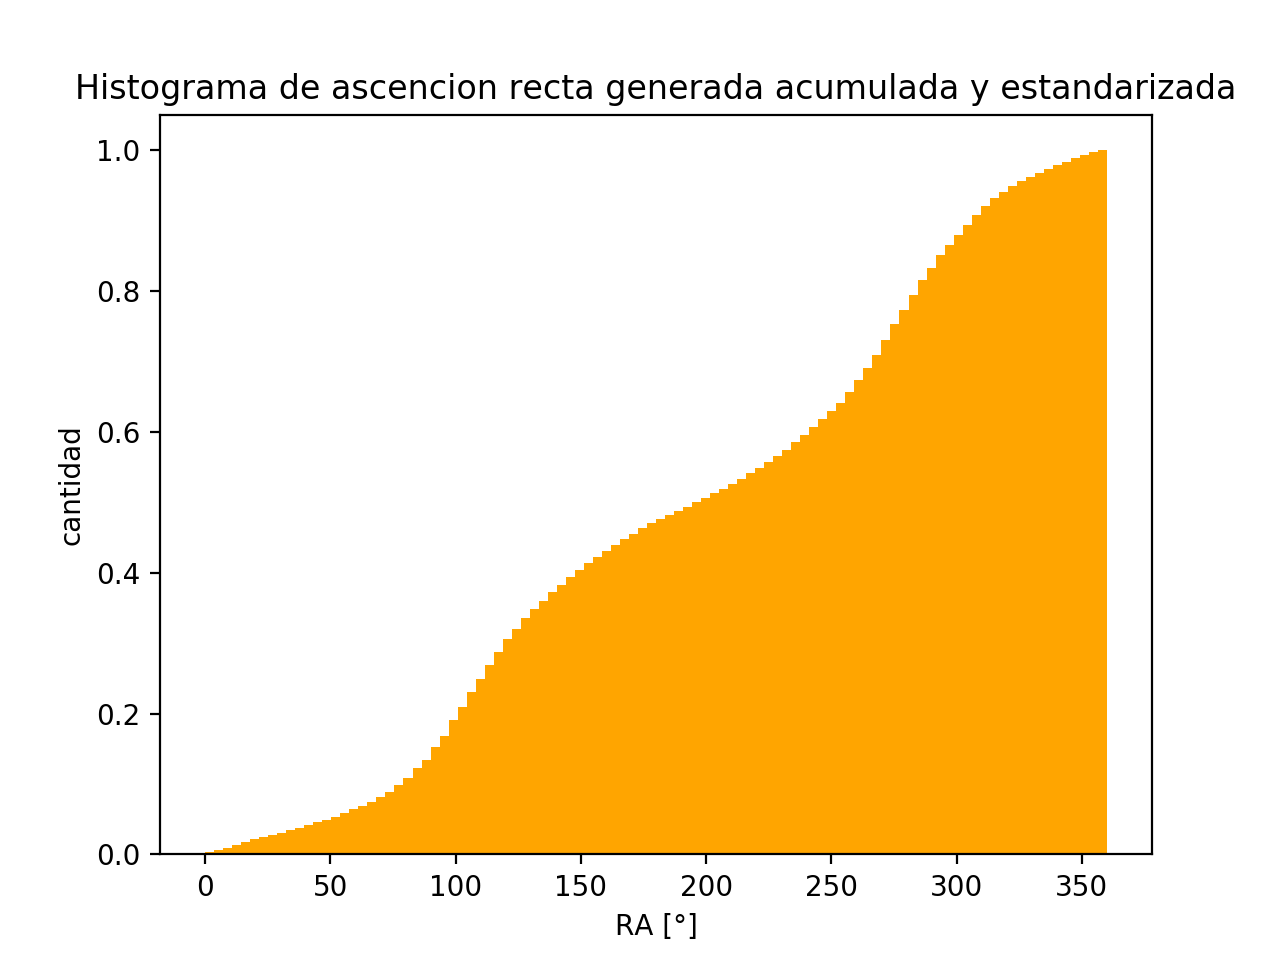

In [16]:
plt.figure()
gen_ra_cumulative, gen_ra_bins, gen_patches = plt.hist(result_ra, bins=bins, cumulative=1, density=1, color="orange")
plt.title("Histograma de ascencion recta generada acumulada y estandarizada")
plt.xlabel("RA [°]")
plt.ylabel("cantidad")
plt.show()

#### Comparación 
Graficando ambos histogramas juntos

<IPython.core.display.Javascript object>


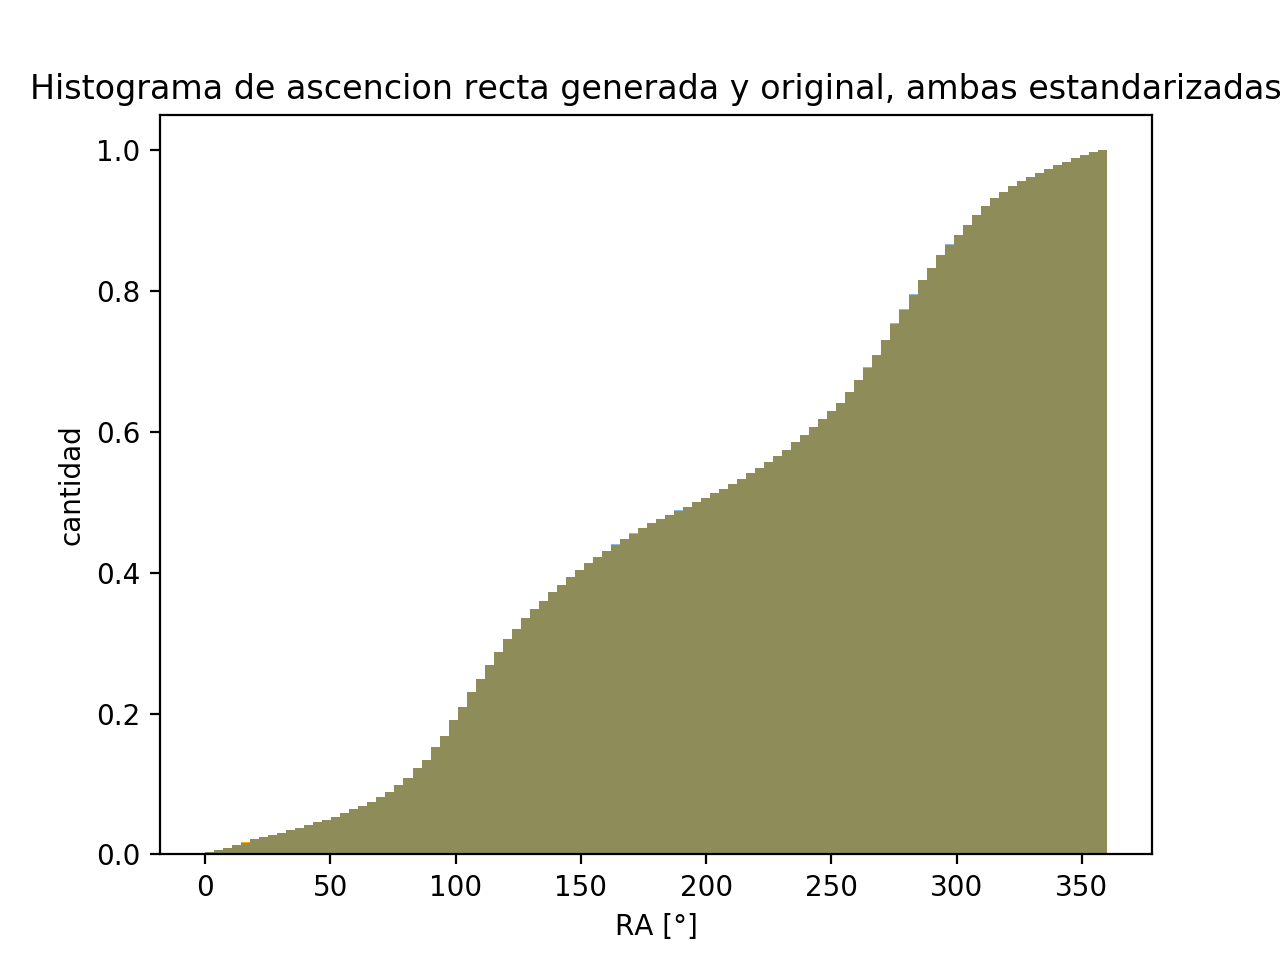

In [17]:
plt.figure()
plt.hist(result_ra, bins=bins, cumulative=1, density=1, alpha=1, color="orange")
plt.hist(t['RA'], bins=bins, cumulative=1, density=1, alpha=0.5)
plt.title("Histograma de ascencion recta generada y original, ambas estandarizadas")
plt.xlabel("RA [°]")
plt.ylabel("cantidad")
plt.show()

<IPython.core.display.Javascript object>


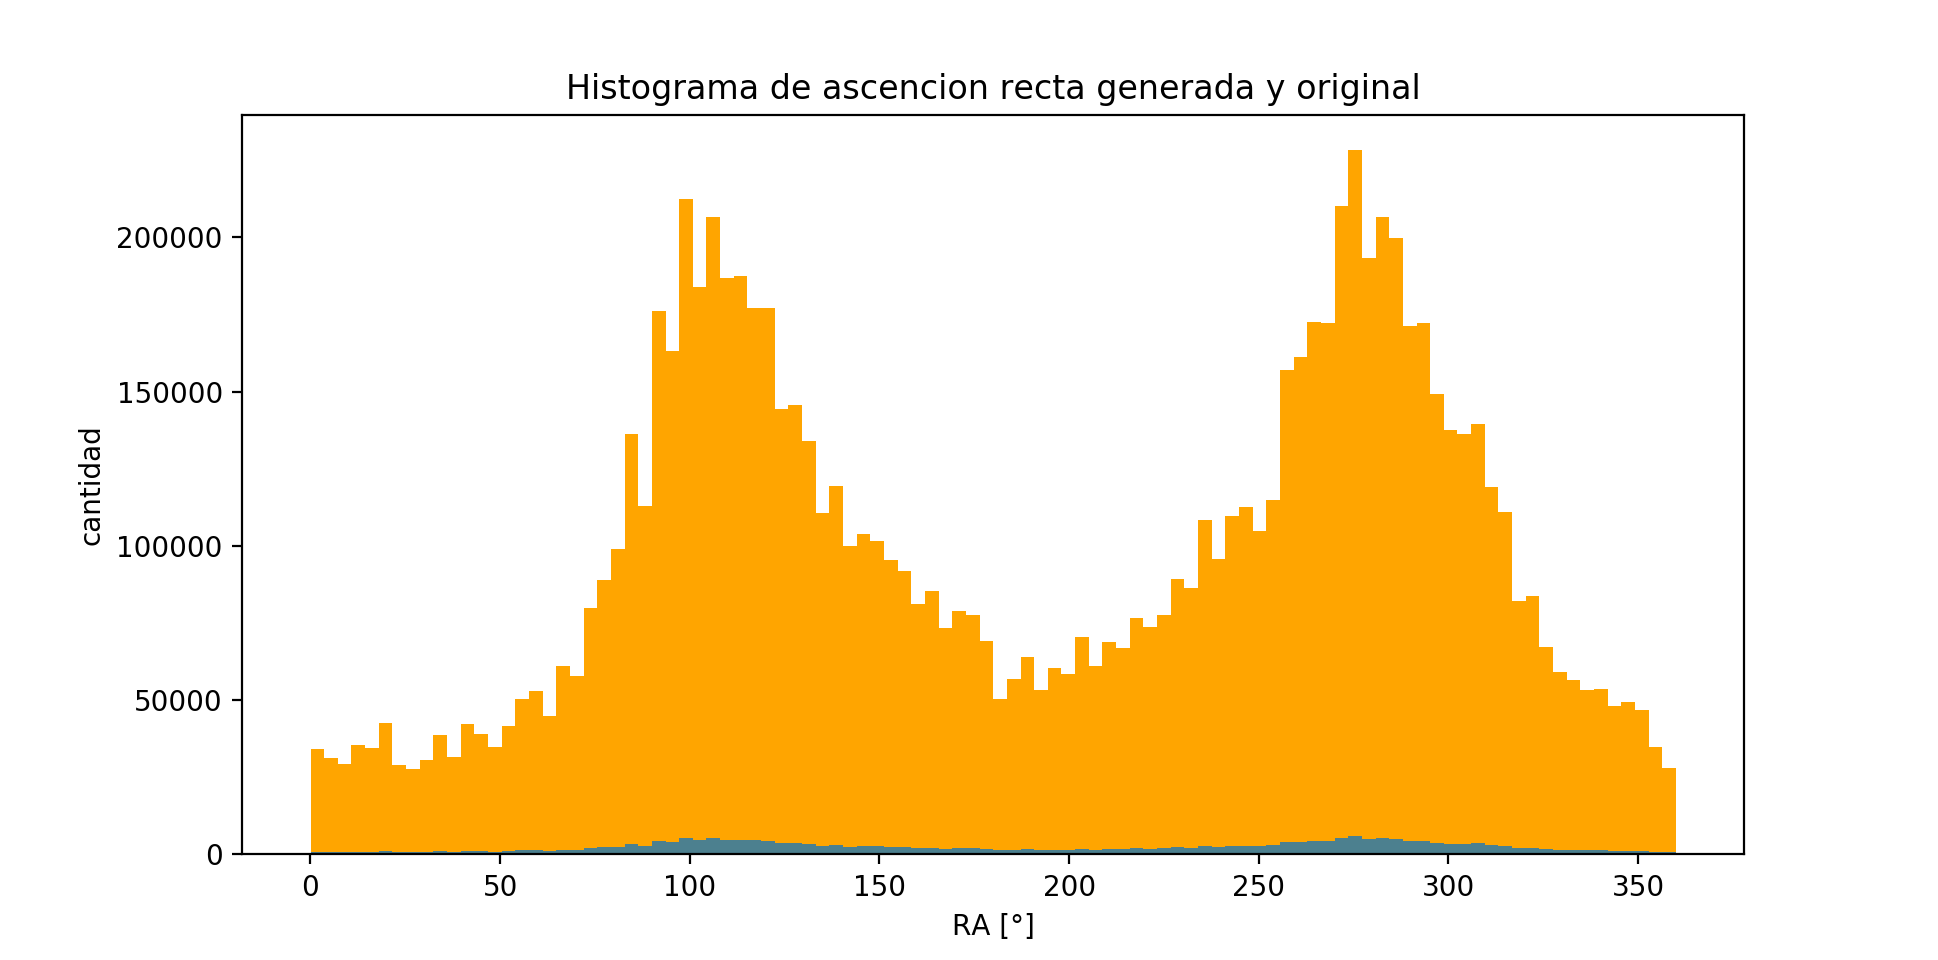

In [14]:
plt.figure()
plt.hist(result_ra, bins=bins, alpha=1, color="orange")
plt.hist(t['RA'], bins=bins, alpha=0.8)
plt.title("Histograma de ascencion recta generada y original")
plt.xlabel("RA [°]")
plt.ylabel("cantidad")
plt.show()

### 2.5.- Comparando std y mean de los datos

In [18]:
print("std original: "+str(np.std(t['RA']))+", std generados: "+str(np.std(result_ra)))
print("mean original: "+str(np.mean(t['RA']))+", mean generados: "+str(np.mean(result_ra)))

std original: 91.58404375403198, std generados: 91.61860596441758
mean original: 193.55368057030503, mean generados: 193.59026973654193


### 2.7.- Realizando mismo procedimiento para declinación

<IPython.core.display.Javascript object>


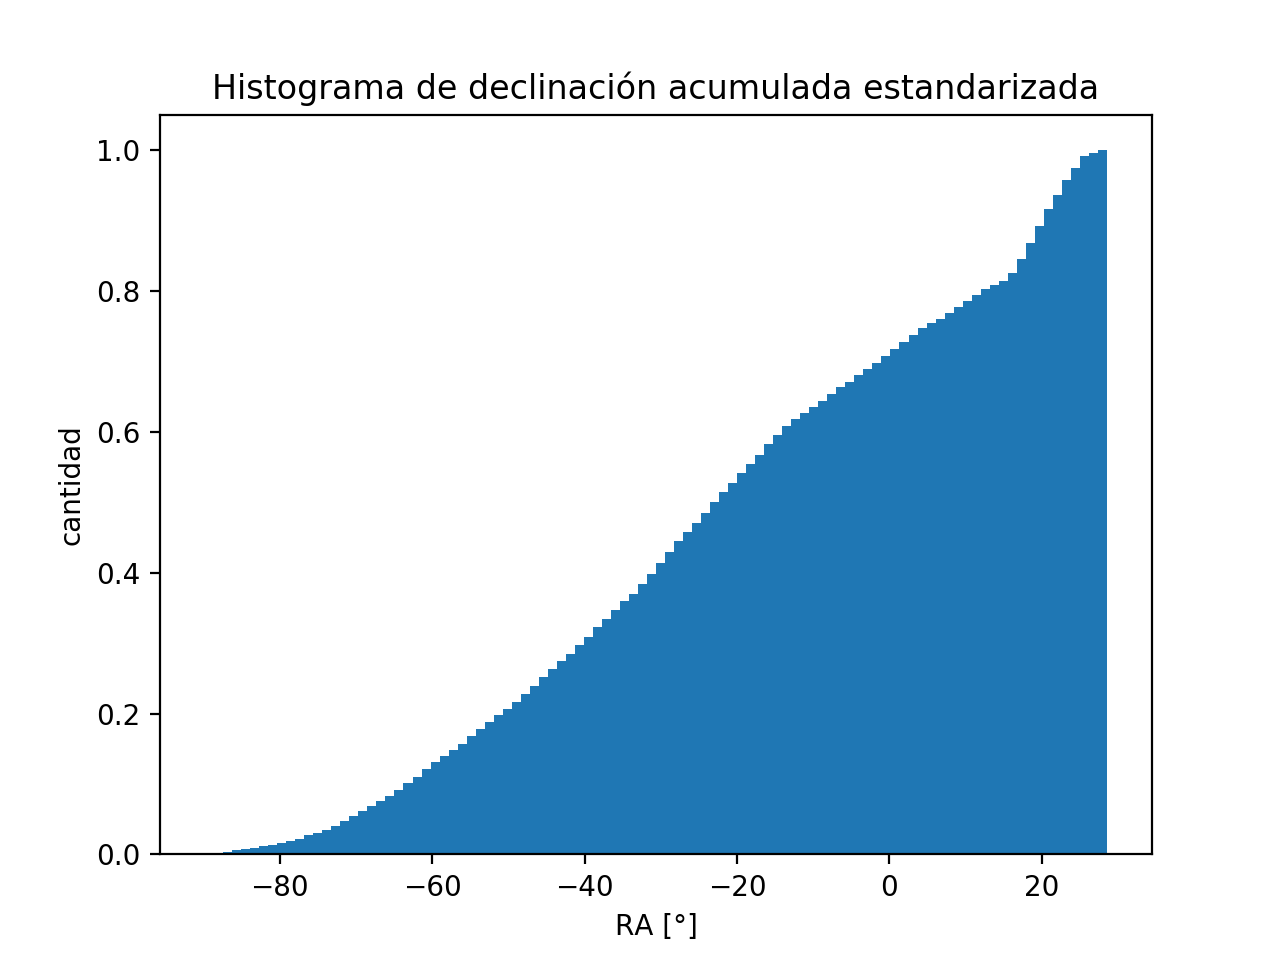

In [19]:
plt.figure()
dec_cumulative, dec_bins, patches = plt.hist(t['DEC'], bins=bins, cumulative=1, density=1)
plt.title("Histograma de declinación acumulada estandarizada")
plt.xlabel("RA [°]")
plt.ylabel("cantidad")
plt.show()

Definiendo función deformadora de uniforme para DEC, generando números aleatorios y aplicando deformación.

In [20]:
def dec_uniform_deform(x):
    index = np.where(x < dec_cumulative)[0][0]
    return (dec_bins[index+1]-dec_bins[index])*np.random.uniform(0,1,1)[0]+dec_bins[index]
vf = np.vectorize(dec_uniform_deform)
dec_uni = np.random.uniform(0, 1, n)
result_dec = np.array([dec_uniform_deform(xi) for xi in dec_uni])

Graficando distribución de la declinación original vs generada

<IPython.core.display.Javascript object>


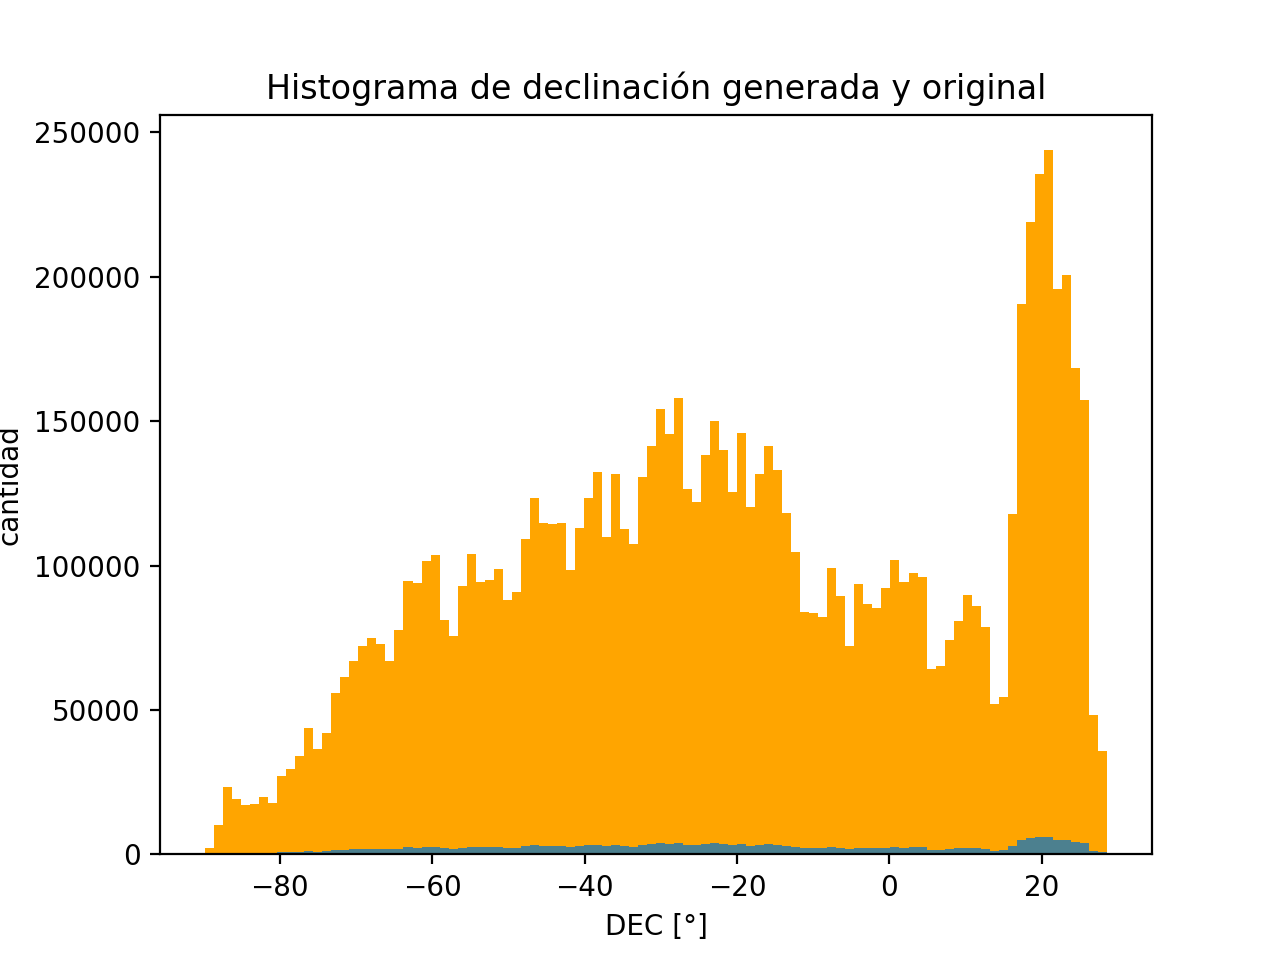

In [21]:
plt.figure()
plt.hist(result_dec, bins=bins, alpha=1, color="orange")
plt.hist(t['DEC'], bins=bins, alpha=0.8)
plt.title("Histograma de declinación generada y original")
plt.xlabel("DEC [°]")
plt.ylabel("cantidad")
plt.show()

### 2.8.- Juntando datos generados con originales

Creando tabla auxiliar con los generados

In [22]:
t_aux = Table(data=(result_ra, result_dec), names=("RA","DEC"))

Agregando datos originales a la tabla auxiliar

In [23]:
t_aux

RA,DEC
float64,float64
6.817949756401168,-75.00038915572793
126.33884139977407,-67.254977174786
317.25084586017147,-49.8716322696693
213.4924456142578,-29.800378878576353
171.25529243533876,20.994118039541966
260.5200369822718,-67.37275618542677
152.96382576903866,17.900186022704936
331.8056588302436,23.08044162664308
93.00600707811425,23.7084118096765


In [24]:
t_aux = vstack([t_aux, t])

Tabla final

In [26]:
t_aux['RA']

6.817949756401168
126.33884139977407
317.25084586017147
213.4924456142578
171.25529243533876
260.5200369822718
152.96382576903866
331.8056588302436
93.00600707811425
214.2461137246108
345.62202769372846


### 2.9.- Graficando histograma 2d con todos los datos

<IPython.core.display.Javascript object>


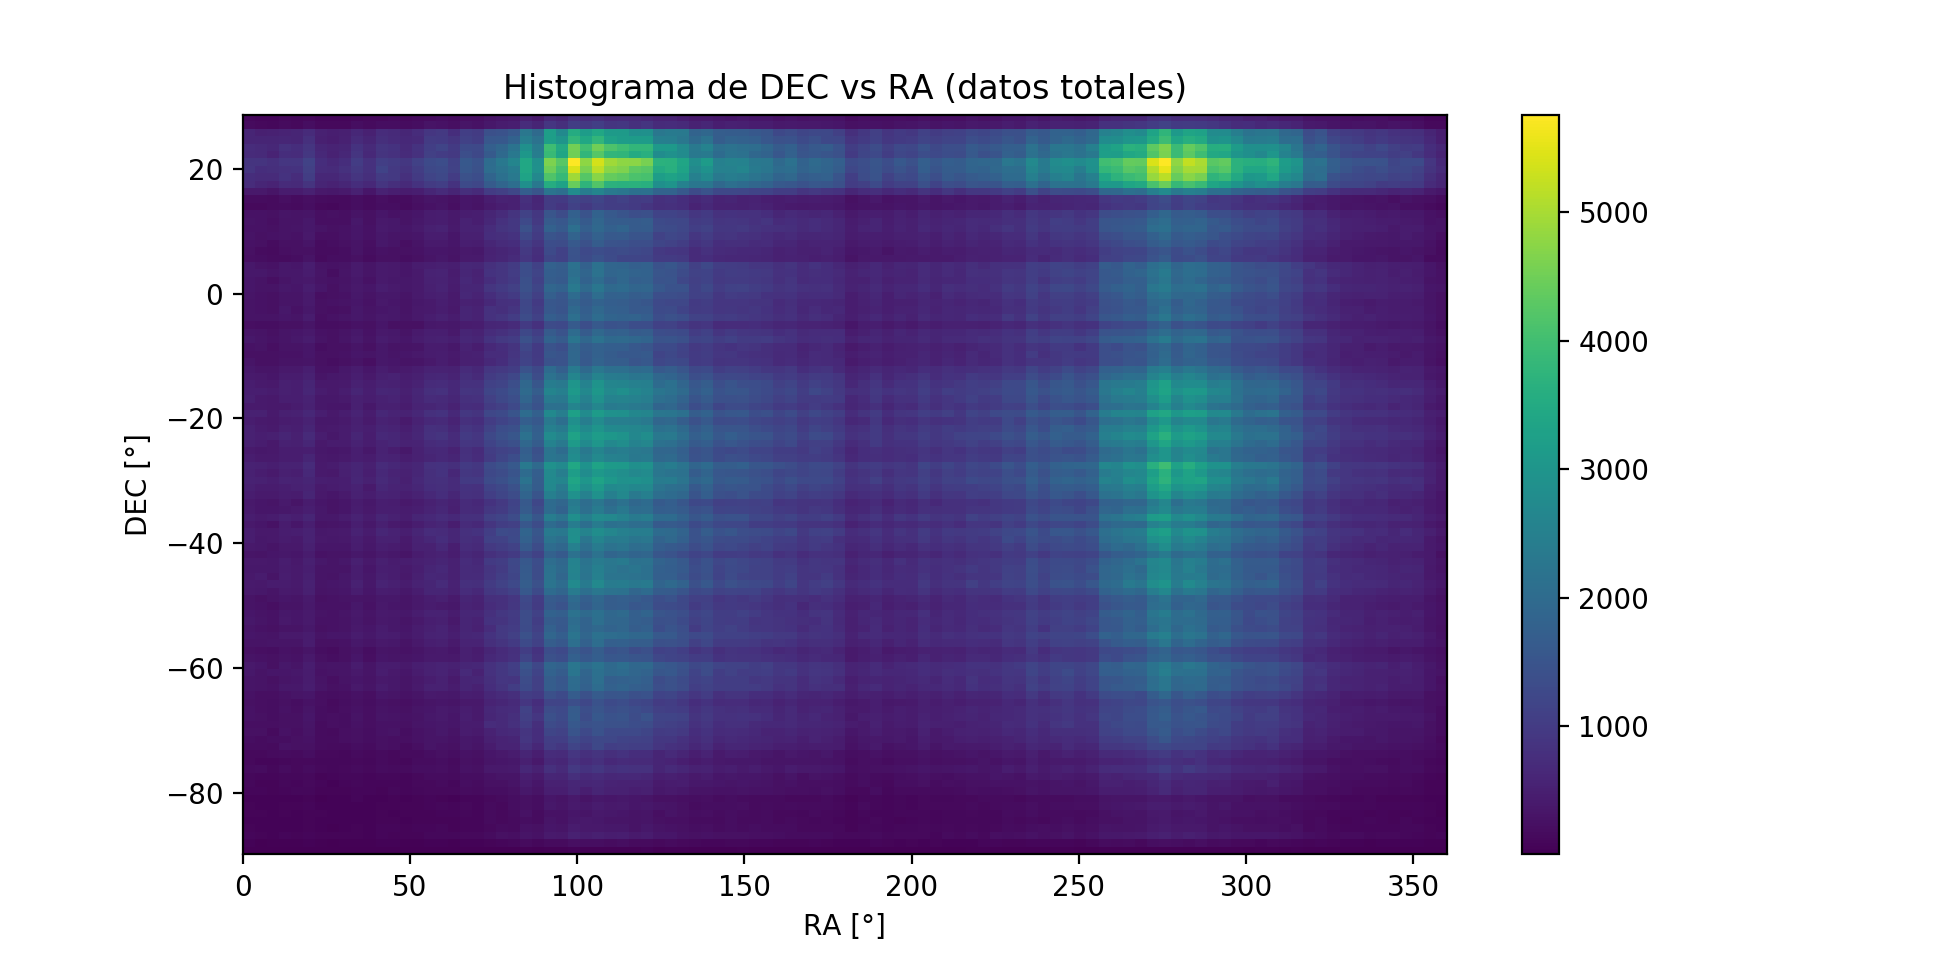

In [27]:
import matplotlib.colors as mcolors
from numpy.random import multivariate_normal
plt.figure()
plt.hist2d(t_aux['RA'], t_aux['DEC'], bins=100)
plt.title("Histograma de DEC vs RA (datos totales)")
plt.xlabel("RA [°]")
plt.ylabel("DEC [°]")
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


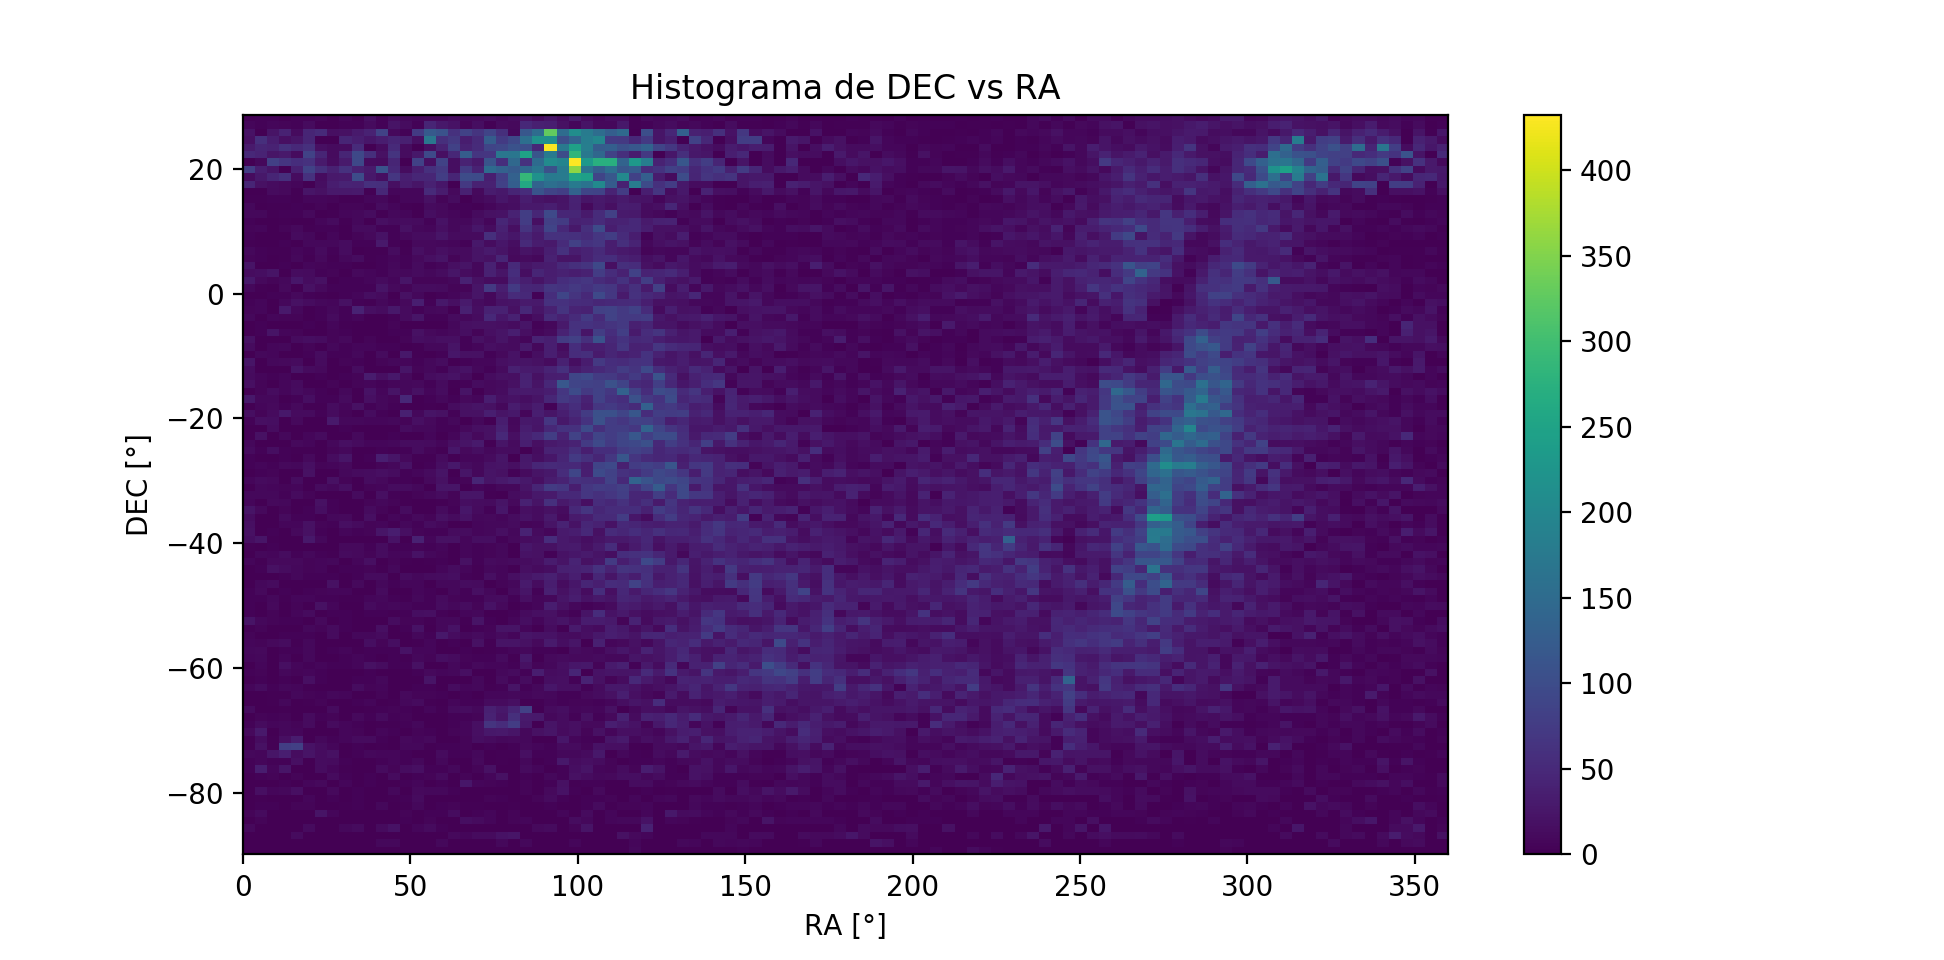

In [28]:
plt.figure()
plt.hist2d(t['RA'], t['DEC'], bins=100)
plt.title("Histograma de DEC vs RA")
plt.xlabel("RA [°]")
plt.ylabel("DEC [°]")
plt.colorbar()
plt.show()

In [30]:
pickle.dump(t_aux, open( "knn_data/10M_data.p", "wb" ) )